In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU detected by TensorFlow:")
    for gpu in gpus:
        print("  -", gpu)
else:
    print("❌ No GPU detected. TensorFlow will use CPU.")


C:\Users\Yasi Kasmi\anaconda3\envs\tf-gpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


✅ GPU detected by TensorFlow:
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
# EDA Script for Stack Overflow Tag Prediction
#%load_ext cudf.pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the CSV files
questions = pd.read_csv('F:\Firefox downloader\Projects\Project1\stacksample\Questions.csv', encoding= 'latin-1')
tags = pd.read_csv('F:\Firefox downloader\Projects\Project1\stacksample\Tags.csv', encoding= 'latin-1')

In [5]:
# Display first few rows of each DataFrame
print("Questions Data Sample:")
display(questions.head())


Questions Data Sample:


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [6]:
print("\nTags Data Sample:")
display(tags.head())


Tags Data Sample:


,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [7]:
# Check for missing values
print("\nMissing Values in Questions:")
print(questions.isnull().sum())


Missing Values in Questions:
Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64


In [8]:
print("\nMissing Values in Tags:")
print(tags.isnull().sum())


Missing Values in Tags:
Id        0
Tag    1113
dtype: int64


In [9]:
# Basic info
print("\nQuestions Info:")
questions.info()
print("\nTags Info:")
tags.info()


Questions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB

Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [10]:
# Number of unique questions and tags
num_questions = questions['Id'].nunique()
num_tags = tags['Tag'].nunique()
print(f"\nNumber of unique questions: {num_questions}")
print(f"Number of unique tags: {num_tags}")


Number of unique questions: 1264216
Number of unique tags: 37034


In [11]:
# Top 10 most frequent tags
top_tags = tags['Tag'].value_counts().head(10)
print("\nTop 10 Most Frequent Tags:")
print(top_tags)


Top 10 Most Frequent Tags:
Tag
javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: count, dtype: int64


C:\Users\Yasi Kasmi\AppData\Local\Temp\ipykernel_1732\362511293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')


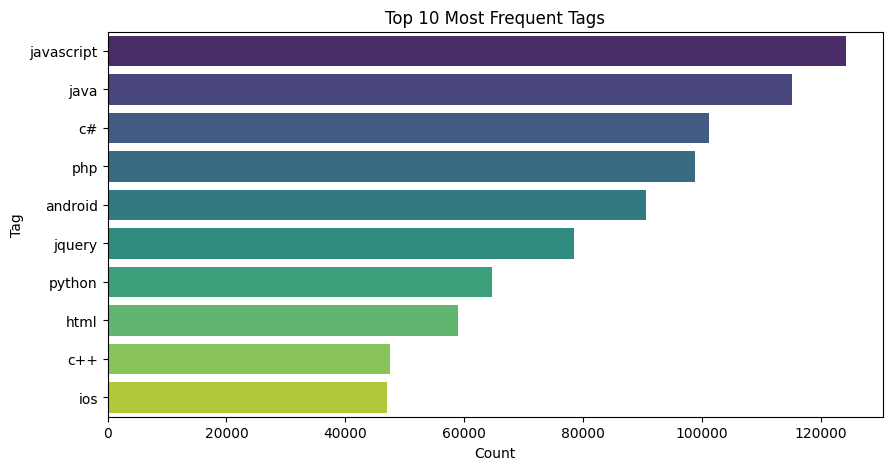

In [12]:
# Visualize top 10 tags
plt.figure(figsize=(10,5))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

In [13]:
# Distribution of number of tags per question
tags_per_question = tags.groupby('Id').size()
print("\nTags per Question (Summary):")
print(tags_per_question.describe())


Tags per Question (Summary):
count    1.264216e+06
mean     2.967052e+00
std      1.206987e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
dtype: float64


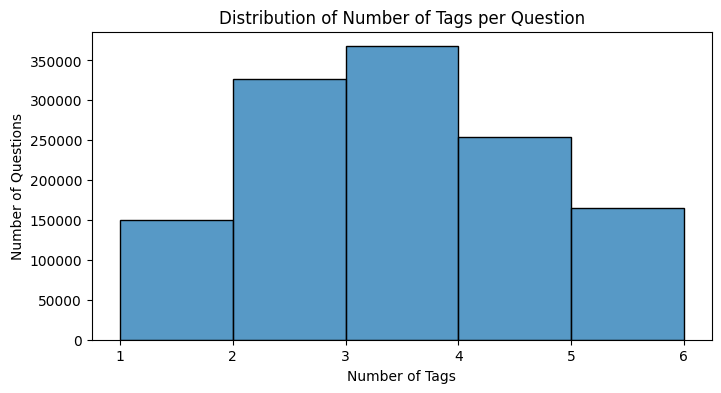

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(tags_per_question, bins=range(1, tags_per_question.max()+2), kde=False)
plt.title('Distribution of Number of Tags per Question')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Questions')
plt.show()

In [15]:
# Merge tags with questions for further analysis
questions_tags = pd.merge(tags, questions, on='Id', how='left')

In [16]:
# Analyze question text lengths (Title and Body)
questions['Title_length'] = questions['Title'].astype(str).apply(len)
questions['Body_length'] = questions['Body'].astype(str).apply(len)

print("\nTitle Length Statistics:")
print(questions['Title_length'].describe())

print("\nBody Length Statistics:")
print(questions['Body_length'].describe())


Title Length Statistics:
count    1.264216e+06
mean     5.173002e+01
std      1.980663e+01
min      9.000000e+00
25%      3.700000e+01
50%      4.900000e+01
75%      6.300000e+01
max      1.890000e+02
Name: Title_length, dtype: float64

Body Length Statistics:
count    1.264216e+06
mean     1.410486e+03
std      1.869814e+03
min      1.800000e+01
25%      5.140000e+02
50%      8.950000e+02
75%      1.600000e+03
max      4.648900e+04
Name: Body_length, dtype: float64


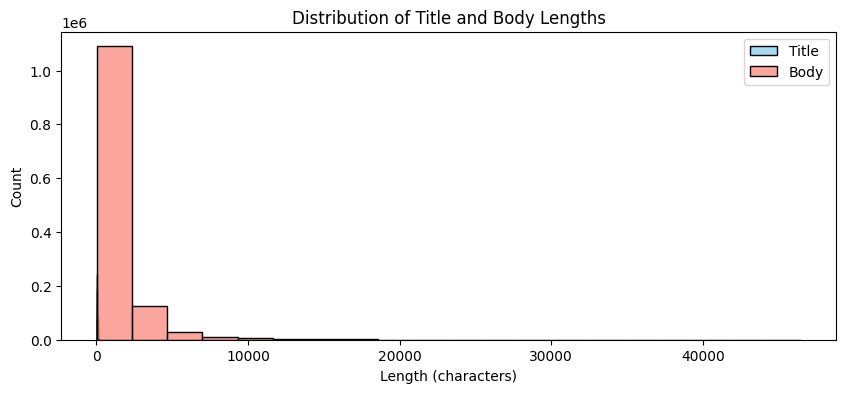

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(questions['Title_length'], bins=20, color='skyblue', label='Title')
sns.histplot(questions['Body_length'], bins=20, color='salmon', label='Body', alpha=0.7)
plt.title('Distribution of Title and Body Lengths')
plt.xlabel('Length (characters)')
plt.legend()
plt.show()

In [18]:
# Check for duplicate questions or tags
duplicates_questions = questions.duplicated(subset=['Id']).sum()
duplicates_tags = tags.duplicated().sum()
print(f"\nNumber of duplicate question Ids: {duplicates_questions}")
print(f"Number of duplicate tag rows: {duplicates_tags}")


Number of duplicate question Ids: 0
Number of duplicate tag rows: 1


In [19]:
# Check for empty titles or bodies
empty_titles = (questions['Title'].astype(str).str.strip() == '').sum()
empty_bodies = (questions['Body'].astype(str).str.strip() == '').sum()
print(f"\nNumber of empty titles: {empty_titles}")
print(f"Number of empty bodies: {empty_bodies}")


Number of empty titles: 0
Number of empty bodies: 0


In [20]:
# Example: Show a question with its tags
example_id = tags['Id'].iloc[0]
example_question = questions[questions['Id'] == example_id]
example_tags = tags[tags['Id'] == example_id]['Tag'].tolist()
print(f"\nExample Question ID: {example_id}")
print("Title:", example_question['Title'].values[0])
print("Tags:", example_tags)


Example Question ID: 80
Title: SQLStatement.execute() - multiple queries in one statement
Tags: ['flex', 'actionscript-3', 'air']


In [21]:
# Text Preprocessing and Cleaning

import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ModuleNotFoundError: No module named 'nltk'

In [22]:
# Load in chunks to save memory
tags_iter = pd.read_csv('F:\Firefox downloader\Projects\Project1\stacksample\Tags.csv', usecols=['Id', 'Tag'], chunksize=10**6)
tag_counts = {}

In [23]:
# Count tag frequencies
for chunk in tags_iter:
    for tag in chunk['Tag']:
        tag_counts[tag] = tag_counts.get(tag, 0) + 1

In [24]:
# Get top 10 tags
top_tags = pd.Series(tag_counts).sort_values(ascending=False).head(10).index.tolist()
print(top_tags)

['javascript', 'java', 'c#', 'php', 'android', 'jquery', 'python', 'html', 'c++', 'ios']


In [28]:
# Reload tags, filter for top tags
tags_iter = pd.read_csv('F:\Firefox downloader\Projects\Project1\stacksample\Tags.csv', usecols=['Id', 'Tag'], chunksize=10**6)
filtered_tags = []
for chunk in tags_iter:
    filtered_chunk = chunk[chunk['Tag'].isin(top_tags)]
    filtered_tags.append(filtered_chunk)
filtered_tags = pd.concat(filtered_tags)

In [29]:
# Get unique question IDs with top tags
question_ids = filtered_tags['Id'].unique()

In [30]:
# Now load only relevant questions
questions_iter = pd.read_csv('F:\Firefox downloader\Projects\Project1\stacksample\Questions.csv', usecols=['Id', 'Title', 'Body'], chunksize=10**5, encoding='latin-1')
filtered_questions = []
for chunk in questions_iter:
    filtered_chunk = chunk[chunk['Id'].isin(question_ids)]
    filtered_questions.append(filtered_chunk)
filtered_questions = pd.concat(filtered_questions)

In [31]:
def strip_html(text):
    # Use a fast parser for large scale
    return BeautifulSoup(text, "lxml").get_text(separator=" ") if pd.notnull(text) else ""

# Clean Title and Body
filtered_questions['Title'] = filtered_questions['Title'].astype(str)
filtered_questions['Body'] = filtered_questions['Body'].astype(str)

# Remove HTML from Body (vectorized)
filtered_questions['Body_no_html'] = filtered_questions['Body'].map(strip_html)

# Lowercase and remove non-alphabetic chars (vectorized)
filtered_questions['Cleaned_Title'] = (
    filtered_questions['Title']
    .str.lower()
    .str.replace(r'[^a-z\s]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

filtered_questions['Cleaned_Body'] = (
    filtered_questions['Body_no_html']
    .str.lower()
    .str.replace(r'[^a-z\s]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# Combine for modeling
filtered_questions['Combined_Text'] = (
    filtered_questions['Cleaned_Title'] + " " + filtered_questions['Cleaned_Body']
)

In [32]:
filtered_questions.to_csv('filtered_questions_cleaned.csv', index=False)
filtered_tags.to_csv('filtered_tags_top10.csv', index=False)


In [33]:
filtered_questions.head()

,Id,Title,Body,Body_no_html,Cleaned_Title,Cleaned_Body,Combined_Text
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,I have a little game written in C#. It uses a ...,adding scripting functionality to net applicat...,i have a little game written in c it uses a da...,adding scripting functionality to net applicat...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,I am working on a collection of classes used f...,should i use nested classes in this case,i am working on a collection of classes used f...,should i use nested classes in this case i am ...
8,650,Automatically update version number,<p>I would like the version property of my app...,I would like the version property of my applic...,automatically update version number,i would like the version property of my applic...,automatically update version number i would li...
10,930,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,What's the simplest way to connect and query a...,how do i connect to a database and loop over a...,what s the simplest way to connect and query a...,how do i connect to a database and loop over a...
11,1010,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,I need to grab the base64-encoded representati...,how to get the value of built encoded viewstate,i need to grab the base encoded representation...,how to get the value of built encoded viewstat...


In [34]:
filtered_questions_cleaned= pd.read_csv('filtered_questions_cleaned.csv')

In [35]:
filtered_tags = pd.read_csv('filtered_tags_top10.csv')

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

In [37]:
# 1. Group tags per question
tags_per_question = (
    filtered_tags.groupby('Id')['Tag']
    .apply(list)
    .reset_index()
)

In [38]:
# 2. Only keep tags that are in top_tags
tags_per_question['Tag'] = tags_per_question['Tag'].apply(
    lambda tag_list: [tag for tag in tag_list if tag in top_tags]
)

In [39]:
# 3. Remove questions with no tags in top_tags (if any)
tags_per_question = tags_per_question[tags_per_question['Tag'].map(len) > 0]

In [40]:
# 4. Merge with questions to ensure only relevant questions are kept
questions_targets = pd.merge(
    filtered_questions_cleaned,
    tags_per_question,
    on='Id',
    how='inner'
)

In [41]:
# 5. Multi-label binarization
mlb = MultiLabelBinarizer(classes=top_tags)
tag_matrix = mlb.fit_transform(questions_targets['Tag'])

In [42]:
# 6. Create DataFrame for tag matrix
tag_df = pd.DataFrame(tag_matrix, columns=mlb.classes_, index=questions_targets.index)

In [43]:
# 7. Concatenate with cleaned questions
final_df = pd.concat([questions_targets.reset_index(drop=True), tag_df], axis=1)


In [44]:
# 8. Drop the original 'Tag' column (optional, as you now have binary columns)
final_df = final_df.drop(columns=['Tag'])

In [45]:
# Show the first few rows
print(final_df.head())

     Id                                              Title  \
0   260  Adding scripting functionality to .NET applica...   
1   330          Should I use nested classes in this case?   
2   650                Automatically update version number   
3   930  How do I connect to a database and loop over a...   
4  1010  How to get the value of built, encoded ViewState?   

                                                Body  \
0  <p>I have a little game written in C#. It uses...   
1  <p>I am working on a collection of classes use...   
2  <p>I would like the version property of my app...   
3  <p>What's the simplest way to connect and quer...   
4  <p>I need to grab the base64-encoded represent...   

                                        Body_no_html  \
0  I have a little game written in C#. It uses a ...   
1  I am working on a collection of classes used f...   
2  I would like the version property of my applic...   
3  What's the simplest way to connect and query a...   
4  I need 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use only the Combined_Text column for vectorization
texts = filtered_questions_cleaned['Combined_Text'].astype(str).tolist()

In [47]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=10000,      # Limit features for memory/speed (tune as needed)
    ngram_range=(1,2),       # Use unigrams and bigrams
    stop_words='english'     # Removes English stopwords
)

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

C:\Users\Yasi Kasmi\anaconda3\envs\tf-gpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [49]:
# Use the cleaned and combined text
texts = filtered_questions_cleaned['Combined_Text'].astype(str).tolist()

In [50]:
# Set parameters
max_words = 10000   # Vocabulary size
max_len = 200       # Max sequence length (tune as needed)

In [51]:
# 1. Tokenize
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [52]:
# 2. Pad sequences
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')


In [53]:
# 3. Prepare targets (multi-label)
tag_columns = top_tags  # List of your top 10 tags
y = final_df[tag_columns].values.astype(np.float32)

print(f"Input shape: {X.shape}, Target shape: {y.shape}")

Input shape: (706336, 200), Target shape: (706336, 10)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [56]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())  # Verify GPU availability


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7952562554169243173
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6272581632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13972512187635480348
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:08:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [57]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64),  # Removed return_sequences=True
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(tag_columns), activation='sigmoid')  # Multi-label: sigmoid
])
model.build(input_shape=(None, max_len)) # Explicitly build the model

In [58]:
model.compile(
    loss='binary_crossentropy',  # Multi-label
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 677,834
Trainable params: 677,834
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(
    X_train, y_train,
    epochs=5,                # Start with 5, tune as needed
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/5
8830/8830 [==============================] - 130s 14ms/step - loss: 0.3094 - accuracy: 0.3042 - val_loss: 0.2784 - val_accuracy: 0.3697
Epoch 2/5
8830/8830 [==============================] - 124s 14ms/step - loss: 0.2273 - accuracy: 0.5318 - val_loss: 0.1347 - val_accuracy: 0.7351
Epoch 3/5
8830/8830 [==============================] - 123s 14ms/step - loss: 0.1106 - accuracy: 0.8050 - val_loss: 0.0900 - val_accuracy: 0.8301
Epoch 4/5
8830/8830 [==============================] - 123s 14ms/step - loss: 0.0900 - accuracy: 0.8335 - val_loss: 0.0825 - val_accuracy: 0.8368
Epoch 5/5
8830/8830 [==============================] - 126s 14ms/step - loss: 0.0818 - accuracy: 0.8437 - val_loss: 0.0788 - val_accuracy: 0.8423


In [60]:
from sklearn.metrics import classification_report

# Predict on validation set
y_pred = model.predict(X_val)
y_pred_bin = (y_pred > 0.5).astype(int)

print(classification_report(y_val, y_pred_bin, target_names=tag_columns))

4415/4415 [==============================] - 19s 4ms/step
              precision    recall  f1-score   support

  javascript       0.84      0.77      0.80     24832
        java       0.95      0.80      0.87     23106
          c#       0.92      0.87      0.89     20226
         php       0.94      0.90      0.92     19637
     android       0.96      0.94      0.95     18274
      jquery       0.89      0.75      0.81     15703
      python       0.98      0.93      0.95     12824
        html       0.78      0.48      0.60     11966
         c++       0.92      0.84      0.88      9483
         ios       0.97      0.92      0.94      9466

   micro avg       0.92      0.82      0.87    165517
   macro avg       0.91      0.82      0.86    165517
weighted avg       0.91      0.82      0.86    165517
 samples avg       0.90      0.87      0.87    165517



C:\Users\Yasi Kasmi\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [61]:
# Predict probabilities for each tag
y_pred_probs = model.predict(X_val)

4415/4415 [==============================] - 20s 4ms/step


In [62]:
# Convert probabilities to binary predictions (threshold 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

In [63]:
from sklearn.metrics import classification_report, hamming_loss, accuracy_score

In [64]:
# Print a detailed report per tag
print("Classification Report (per tag):")
print(classification_report(y_val, y_pred, target_names=tag_columns))

Classification Report (per tag):
              precision    recall  f1-score   support

  javascript       0.84      0.77      0.80     24832
        java       0.95      0.80      0.87     23106
          c#       0.92      0.87      0.89     20226
         php       0.94      0.90      0.92     19637
     android       0.96      0.94      0.95     18274
      jquery       0.89      0.75      0.81     15703
      python       0.98      0.93      0.95     12824
        html       0.78      0.48      0.60     11966
         c++       0.92      0.84      0.88      9483
         ios       0.97      0.92      0.94      9466

   micro avg       0.92      0.82      0.87    165517
   macro avg       0.91      0.82      0.86    165517
weighted avg       0.91      0.82      0.86    165517
 samples avg       0.90      0.87      0.87    165517



C:\Users\Yasi Kasmi\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [65]:
# Hamming loss: lower is better
hamming = hamming_loss(y_val, y_pred)
print(f"Hamming Loss: {hamming:.4f}")

Hamming Loss: 0.0297


In [66]:
# Subset accuracy: all tags must match (usually low for multi-label)
subset_acc = accuracy_score(y_val, y_pred)
print(f"Subset Accuracy: {subset_acc:.4f}")

Subset Accuracy: 0.7814


In [68]:
# Save the trained model (HDF5 or TensorFlow SavedModel format)
model.save('stack_overflow_lstm_model.h5')  # HDF5 format
# Or for SavedModel format (recommended for TensorFlow 2.x)
model.save('stack_overflow_lstm_model.keras')

In [69]:
import pickle

# Save the tokenizer object
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [70]:
with open('mlb.pkl', 'wb') as f:
    pickle.dump(mlb, f)
